In [261]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
df = pd.read_csv(r"crypto_dataset2.csv")
df = df.set_index("Date")
df.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-11-13 00:00:00+00:00,6559.490234,6263249920,316.716003,1041889984,1.00935,767884032,1.68662,12238800
2017-11-14 00:00:00+00:00,6635.750000,3197110016,337.631012,1069680000,1.00683,429857984,1.59258,7829600
2017-11-15 00:00:00+00:00,7315.540039,4200880128,333.356995,722665984,1.00318,449671008,1.53045,7615500
2017-11-16 00:00:00+00:00,7871.689941,5123809792,330.924011,797254016,1.00212,650278976,1.57792,8928640
2017-11-17 00:00:00+00:00,7708.990234,4651670016,332.394012,621732992,1.00139,639398016,1.51036,8508840


In [263]:
df.shape

(1827, 8)

In [264]:
df.isnull().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [265]:
df.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,20228.315369,2.630272e+10,1129.229883,1.308885e+10,1.001606,4.156009e+10,143.886168,9.717711e+08
std,17028.454586,1.995516e+10,1203.999710,1.086878e+10,0.005771,3.842981e+10,184.167061,1.452963e+09
min,3236.761719,2.923670e+09,84.308296,6.217330e+08,0.966644,4.298580e+08,1.510360,9.284000e+03
25%,7666.110107,1.082725e+10,208.977219,4.495085e+09,0.999988,6.042266e+09,14.114409,1.360422e+08
50%,10793.339844,2.399141e+10,474.911011,1.095112e+10,1.000508,3.639024e+10,23.811028,3.480300e+08
75%,33734.515625,3.563229e+10,1802.761414,1.836356e+10,1.002518,6.090617e+10,293.938461,1.410656e+09
max,67566.828125,3.509679e+11,4812.087402,8.448291e+10,1.077880,2.790675e+11,675.684082,1.798295e+10


# DISCRETIZATION

In [266]:
# Discretization
cols = df.columns
discretizer = KBinsDiscretizer(n_bins=20, encode='ordinal')
df_discretized = discretizer.fit_transform(df)
df_discretized = pd.DataFrame(df_discretized, columns=cols)
df_discretized.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
0,3.0,3.0,7.0,0.0,18.0,0.0,0.0,0.0
1,3.0,0.0,7.0,0.0,18.0,0.0,0.0,0.0
2,4.0,1.0,7.0,0.0,15.0,0.0,0.0,0.0
3,5.0,2.0,7.0,0.0,14.0,0.0,0.0,0.0
4,5.0,1.0,7.0,0.0,13.0,0.0,0.0,0.0


# SUMMARIZATION

In [267]:
# Summarization
print(f"MEAN: \n{df.mean()}")

MEAN: 
Close (BTC)      2.022832e+04
Volume (BTC)     2.630272e+10
Close (ETH)      1.129230e+03
Volume (ETH)     1.308885e+10
Close (USDT)     1.001606e+00
Volume (USDT)    4.156009e+10
Close (BNB)      1.438862e+02
Volume (BNB)     9.717711e+08
dtype: float64


In [268]:
print(f"MEDIAN: \n{df.median()}")

MEDIAN: 
Close (BTC)      1.079334e+04
Volume (BTC)     2.399141e+10
Close (ETH)      4.749110e+02
Volume (ETH)     1.095112e+10
Close (USDT)     1.000508e+00
Volume (USDT)    3.639024e+10
Close (BNB)      2.381103e+01
Volume (BNB)     3.480300e+08
dtype: float64


In [269]:
print(f"MODE: \n{df.mode()}")

MODE: 
      Close (BTC)  Volume (BTC)  Close (ETH)  Volume (ETH)  Close (USDT)  \
0         6741.75    2923670016    84.308296     621732992      1.000060   
1             NaN    3064030000    84.440811     649638976      1.000090   
2             NaN    3085320000    85.262100     722665984      1.000097   
3             NaN    3104019968    86.539314     797254016      1.001280   
4             NaN    3149319936    88.945305     800819008           NaN   
...           ...           ...          ...           ...           ...   
1822          NaN  117894572511  4651.460449   62691789007           NaN   
1823          NaN  118992465607  4667.115234   67610826680           NaN   
1824          NaN  123320567399  4730.384277   69023382175           NaN   
1825          NaN  126358098747  4735.068848   78398214539           NaN   
1826          NaN  350967941479  4812.087402   84482912776           NaN   

      Volume (USDT)  Close (BNB)  Volume (BNB)  
0      6.430213e+10     1.51036

In [270]:
print(f"Standard deviation: \n{df.std()}")

Standard deviation: 
Close (BTC)      1.702845e+04
Volume (BTC)     1.995516e+10
Close (ETH)      1.204000e+03
Volume (ETH)     1.086878e+10
Close (USDT)     5.770870e-03
Volume (USDT)    3.842981e+10
Close (BNB)      1.841671e+02
Volume (BNB)     1.452963e+09
dtype: float64


## Visualisation analysis

In [271]:
# plt.figure(figsize=(18,16))
# sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r);

In [272]:
# plt.figure(figsize = (25, 5))
# sns.set_style('dark')
# sns.lineplot(data=df)

In [273]:
# plt.figure(figsize = (20, 10))
# sns.set_style('dark')
# sns.lineplot(data = df['Close (BNB)'], label = 'BNB')
# sns.lineplot(data = df['Close (ETH)'], label = 'ETH')
# sns.lineplot(data = df['Close (BTC)'], label = 'BTC')
# sns.lineplot(data = df['Close (USDT)'], label = 'USDT')
# plt.title('Adjacent Close Price')

In [274]:
# plt.figure(figsize = (20, 10))
# sns.set_style('dark')
# sns.lineplot(data = df['Volume (BNB)'], label = 'BNB')
# sns.lineplot(data = df['Volume (ETH)'], label = 'ETH')
# sns.lineplot(data = df['Volume (BTC)'], label = 'BTC')
# sns.lineplot(data = df['Volume (USDT)'], label = 'USDT')
# plt.title('Volume')

# Histogram

In [275]:
# df.hist(figsize=(20, 8), layout=(2, 4))

# Pairplot

In [276]:
# sns.pairplot(df.sample(n=100));

## Data preprocessing

In [277]:
X = df.drop(columns = ['Close (BTC)'], axis = 1)
Y = df['Close (BTC)']

In [278]:
from sklearn.preprocessing import MinMaxScaler
col = X.columns
scaler = MinMaxScaler()
data = scaler.fit_transform(X)
X = pd.DataFrame(data, columns=col)

In [279]:
# from sklearn.preprocessing import StandardScaler
# cols = X.columns
# standard_scalar = StandardScaler()
# X = standard_scalar.fit_transform(X)
# # st_Xtest = standard_scalar.transform(X_test)
# X = pd.DataFrame(X, columns=cols)
# # st_X_test = pd.DataFrame(st_Xtest, columns=cols)
# # st_X_train.head()

In [280]:
Y.head()

Date
2017-11-13 00:00:00+00:00    6559.490234
2017-11-14 00:00:00+00:00    6635.750000
2017-11-15 00:00:00+00:00    7315.540039
2017-11-16 00:00:00+00:00    7871.689941
2017-11-17 00:00:00+00:00    7708.990234
Name: Close (BTC), dtype: float64

In [281]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [282]:
X_train

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
1120,0.068878,0.107352,0.120422,0.305000,0.147587,0.041336,0.013288
1795,0.118652,0.254626,0.201253,0.300577,0.215409,0.400996,0.062530
1477,0.084608,0.922377,0.220182,0.304595,0.260594,0.923797,0.134894
512,0.033899,0.019418,0.083600,0.370465,0.049833,0.025104,0.011309
109,0.013495,0.163405,0.015176,0.297440,0.006253,0.012926,0.002582
...,...,...,...,...,...,...,...
1558,0.058574,0.571393,0.180375,0.304892,0.187517,0.590440,0.086443
1608,0.037717,0.672114,0.110735,0.303212,0.142264,0.631355,0.077801
493,0.022720,0.011068,0.053249,0.405373,0.034427,0.019293,0.008495
527,0.040582,0.017242,0.080247,0.349886,0.054763,0.032067,0.014449


In [283]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)
cols = fs.get_support(indices=True)

cols = [X.columns[i] for i in cols]
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)


In [284]:
X_train.head()

,Close (ETH),Volume (USDT),Close (BNB),Volume (BNB)
0,0.107352,0.147587,0.041336,0.013288
1,0.254626,0.215409,0.400996,0.062530
2,0.922377,0.260594,0.923797,0.134894
3,0.019418,0.049833,0.025104,0.011309
4,0.163405,0.006253,0.012926,0.002582


In [285]:
# Standardisation


In [286]:
# # Normalisation
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# # # X_train = pd.DataFrame)
# X_train = pd.DataFrame(X_train, columns=cols)
# X_test = pd.DataFrame(X_test, columns=cols)
# # # scaler1 = MinMaxScaler()
# # Y_train = pd.DataFrame(scaler1.fit_transform(Y_train))
# # Y_test = pd.DataFrame(scaler1.transform(Y_test))

In [287]:
X_train.head()

,Close (ETH),Volume (USDT),Close (BNB),Volume (BNB)
0,0.107352,0.147587,0.041336,0.013288
1,0.254626,0.215409,0.400996,0.062530
2,0.922377,0.260594,0.923797,0.134894
3,0.019418,0.049833,0.025104,0.011309
4,0.163405,0.006253,0.012926,0.002582


# DATA VISUALIZATION

# SCATTER PLOT

In [288]:
# # SCATTERPLOT
# data = df

# plt.plot(data['Close (BTC)'])

# plt.title("Scatter Plot")
 
# plt.xlabel('Date')

# plt.ylabel('Close (BTC)')
 
# plt.show()

## Modelling

In [289]:
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

0.9161938554793835
0.9162340688036215
0.9162712151431428
0.9163054346603068
0.9163365620933859
0.9163646231225081
0.9163896739858406
0.9164118223086055
0.9164307785535126
0.9164468953995194
0.9164646779360527
0.91648019232244
0.9164915374070622
0.9165010825387799
0.9165026689328527
0.9165010724240577
0.9164972765445365
0.9164900771180853


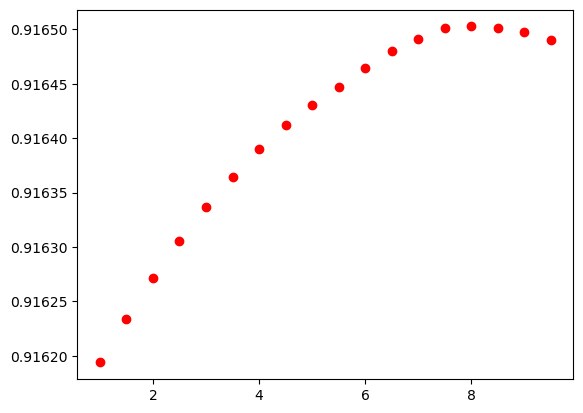

In [290]:
import matplotlib as plt1
import seaborn as sns

for i in np.arange(1,10,0.5):
    model=Lasso(alpha=i)
    model.fit(X_train,Y_train)
    print(model.score(X_test,Y_test))
    
    plt1.pyplot.scatter(i,model.score(X_test,Y_test), label='ynew1', color='red')

### Best parameter for alpha = 3.5

In [291]:
import time
mse_values=[]
execution_times = []
learning_rates = np.linspace(0, 20, 100)
for lr in learning_rates:
    start_time = time.time()
    model = Lasso(alpha=lr)


    model.fit(X_train, Y_train)

    
    y_pred = model.predict(X_test)


    mse = metrics.mean_squared_error(Y_test, y_pred)
    mse_values.append(mse)
    end_time = time.time()

    execution_time = end_time - start_time
    execution_times.append(execution_time)

best_lr_index = np.argmin(mse_values)


best_lr = learning_rates[best_lr_index]


print("Best learning rate:", best_lr)

C:\Users\rjaga\AppData\Local\Temp\ipykernel_2624\944121541.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, Y_train)
C:\Users\rjaga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\rjaga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+10, tolerance: 3.673e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Best learning rate: 8.080808080808081


In [292]:
lasso = Lasso(alpha=best_lr)
lasso.fit(X_train, Y_train)

Lasso(alpha=8.080808080808081)

In [293]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [294]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [295]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

In [296]:
sgd = SGDRegressor()
sgd.fit(X_train, Y_train)


C:\Users\rjaga\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

## Evaluation

In [297]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, r2_score

In [298]:
print("-"*10, "Accuracy", "-"*10)
Y_pred_lasso = lasso.predict(X_test)
r2lasso = r2_score(Y_test, Y_pred_lasso)
print("Lasso regression: ", r2lasso)

Y_pred_lr = lr.predict(X_test)
r2lr = r2_score(Y_test, Y_pred_lr)
print("Linear regression: ", r2lr)


Y_pred_rf = rf.predict(X_test)
r2rf = r2_score(Y_test, Y_pred_rf)
print("Random forest regression: ", r2rf)


Y_pred_est = est.predict(X_test)
r2est = r2_score(Y_test, Y_pred_est)
print("gradient boosting regression: ", r2est)

Y_pred_sgd = sgd.predict(X_test)
r2sgd = r2_score(Y_test, Y_pred_sgd)
print("Stochastic gradient Descent regression: ", r2sgd)


---------- Accuracy ----------
Lasso regression:  0.916503299875931
Linear regression:  0.9161043300460743
Random forest regression:  0.9725382787753291
gradient boosting regression:  0.9627129637241193
Stochastic gradient Descent regression:  0.9160196532281573


In [299]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        if type(X) == pd.core.frame.DataFrame:
            X = X.to_numpy()
            y = y.to_numpy()
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        if type(X) == pd.core.frame.DataFrame:
            X = X.to_numpy()
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        if type(X) == pd.core.frame.DataFrame:
            X = X.to_numpy()
        return self.net_input(X)

    def score(self, X, y):
        if type(X) == pd.core.frame.DataFrame:
            X = X.to_numpy()
            y = y.to_numpy()
        y_pred = self.predict(X)
        return 1 - sum((y - y_pred)**2) / sum((y - y.mean())**2)


In [300]:
linregr = LinearRegressionGD(n_iter=500)
linregr.fit(X_train, Y_train)
acc = linregr.score(X_test, Y_test)
Y_pred_linregr = linregr.predict(X_test)
print("Accuracy of linear regression using gradient descent: ", acc)

Accuracy of linear regression using gradient descent:  0.9168869575614682


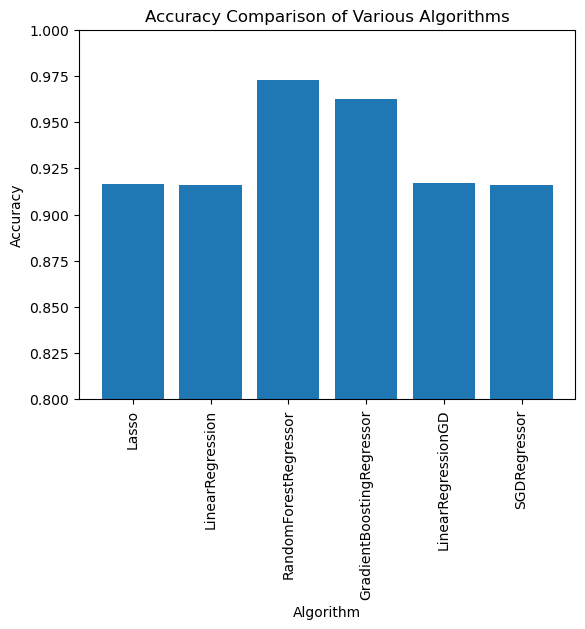

In [301]:
def accuracy_plot(model_list, X, Y):
    scores = []
    algorithms = []
    for model in model_list:
        scores.append(model.score(X,Y))
        name = model.__class__.__name__
        algorithms.append(name)
        
    plt.bar(algorithms, scores)
    plt.ylim([0.8, 1.0])
    plt.xticks(rotation=90)
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Various Algorithms')
    # display the plot
    plt.show()
    
    
models = [lasso, lr, rf, est, linregr, sgd]  
accuracy_plot(models, X_test, Y_test)

In [302]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error
mse_lasso = mean_squared_error(Y_test.to_numpy(),Y_pred_lasso,squared=False)
print("MSE for Lasso : ",mse_lasso)
mae_lasso = mean_absolute_error(Y_test.to_numpy(),Y_pred_lasso)
print("MAE for Lasso : ",mae_lasso)

mse_lr = mean_squared_error(Y_test.to_numpy(),Y_pred_lr,squared=False)
print("MSE for linear regression: ",mse_lr)
mae_lr = mean_absolute_error(Y_test.to_numpy(),Y_pred_lr)
print("MAE for linear regression: ",mae_lr)

mse_rf = mean_squared_error(Y_test.to_numpy(),Y_pred_rf,squared=False)
print("MSE for random forest: ",mse_rf)
mae_rf = mean_absolute_error(Y_test.to_numpy(),Y_pred_rf)
print("MAE for random forest: ",mae_rf)

mse_est = mean_squared_error(Y_test.to_numpy(),Y_pred_est,squared=False)
print("MSE for gradient boosting regression: ",mse_est)
mae_est = mean_absolute_error(Y_test.to_numpy(),Y_pred_est)
print("MAE for gradient boosting regression ",mae_est)

mse_linregr = mean_squared_error(Y_test.to_numpy(),Y_pred_linregr,squared=False)
print("MSE for gradient boosting regression: ",mse_linregr)
mae_linregr = mean_absolute_error(Y_test.to_numpy(),Y_pred_linregr)
print("MAE for gradient boosting regression ",mae_linregr)

mse_sgd = mean_squared_error(Y_test.to_numpy(),Y_pred_sgd,squared=False)
print("MSE for stochastic gradient descent regressor: ",mse_sgd)
mae_sgd = mean_absolute_error(Y_test.to_numpy(),Y_pred_sgd)
print("MAE for stochastic gradient descent regressor ",mae_sgd)

MSE for Lasso :  4966.561116491049
MAE for Lasso :  3005.4005066114223
MSE for linear regression:  4978.41276232625
MAE for linear regression:  3005.302429812406
MSE for random forest:  2848.2952468453936
MAE for random forest:  1324.4705793648252
MSE for gradient boosting regression:  3318.945039346789
MAE for gradient boosting regression  1907.5902602833103
MSE for gradient boosting regression:  4955.137591820146
MAE for gradient boosting regression  3001.310758879181
MSE for stochastic gradient descent regressor:  4980.924511946702
MAE for stochastic gradient descent regressor  3018.1472063570927


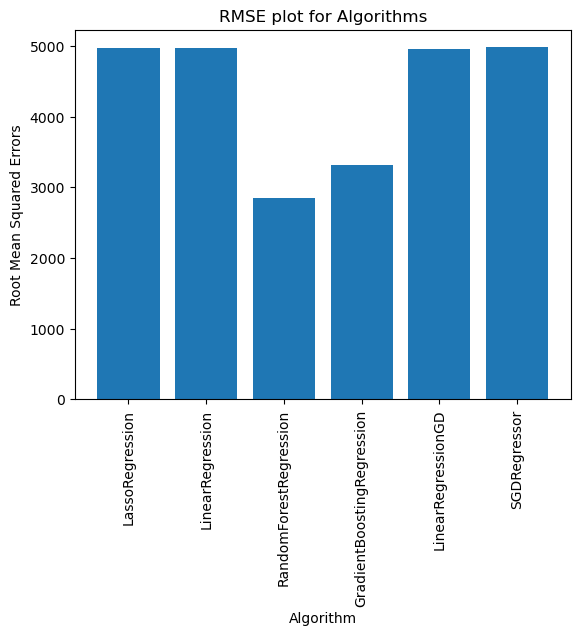

In [303]:
mse_list = [mse_lasso, mse_lr, mse_rf, mse_est, mse_linregr, mse_sgd]
plt.bar(["LassoRegression","LinearRegression","RandomForestRegression","GradientBoostingRegression","LinearRegressionGD","SGDRegressor"], mse_list)
plt.xticks(rotation=90)
plt.xlabel('Algorithm')
plt.ylabel('Root Mean Squared Errors')
plt.title('RMSE plot for Algorithms')
plt.show()  

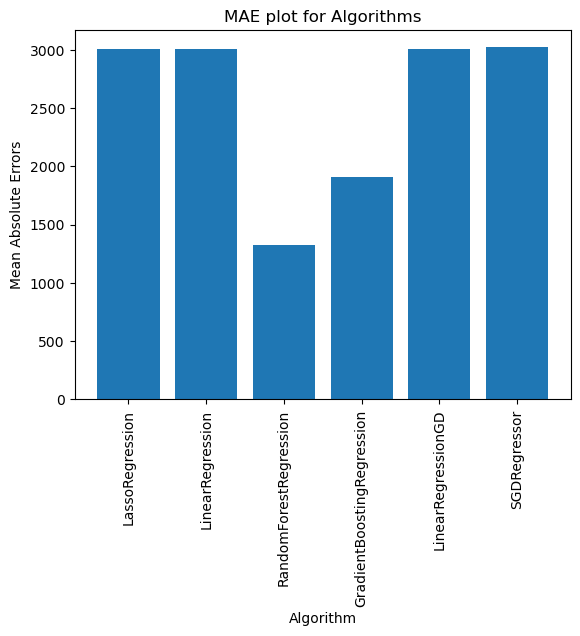

In [304]:
mae_list = [mae_lasso, mae_lr, mae_rf, mae_est, mae_linregr,mae_sgd]
plt.bar(["LassoRegression","LinearRegression","RandomForestRegression","GradientBoostingRegression","LinearRegressionGD","SGDRegressor"], mae_list)
plt.xticks(rotation=90)
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Errors')
plt.title('MAE plot for Algorithms')
plt.show()  

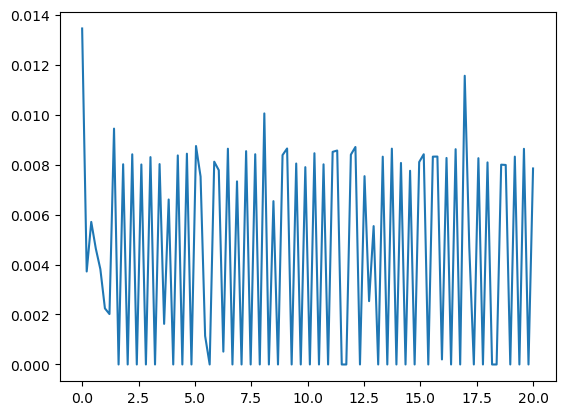

In [305]:
plt.plot(learning_rates, execution_times)

# ETH

In [306]:
# X = df.drop(columns = ['Close (ETH)'], axis = 1)
# Y = df['Close (ETH)']

In [307]:
# Y.head()

In [308]:
# from sklearn.model_selection import train_test_split
# #
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [309]:
# X_train

In [310]:
# from sklearn.feature_selection import SelectKBest

# fs = SelectKBest(k=4)
# X_train = fs.fit_transform(X_train, Y_train)
# X_test = fs.transform(X_test)
# cols = fs.get_support(indices=True)

# cols = [X.columns[i] for i in cols]
# X_train = pd.DataFrame(X_train, columns=cols)
# X_test = pd.DataFrame(X_test, columns=cols)

In [311]:
X_train.head()

,Close (ETH),Volume (USDT),Close (BNB),Volume (BNB)
0,0.107352,0.147587,0.041336,0.013288
1,0.254626,0.215409,0.400996,0.062530
2,0.922377,0.260594,0.923797,0.134894
3,0.019418,0.049833,0.025104,0.011309
4,0.163405,0.006253,0.012926,0.002582


In [312]:
# # Standardisation
# from sklearn.preprocessing import StandardScaler
# standard_scalar = StandardScaler()
# st_Xtrain = standard_scalar.fit_transform(X_train)
# st_Xtest = standard_scalar.transform(X_test)
# st_X_train = pd.DataFrame(st_Xtrain, columns=cols)
# st_X_test = pd.DataFrame(st_Xtest, columns=cols)
# st_X_train.head()

In [313]:
# # Normalisation
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=cols)
# X_test = pd.DataFrame(X_test, columns=cols)

In [314]:
X_train.head()

,Close (ETH),Volume (USDT),Close (BNB),Volume (BNB)
0,0.107352,0.147587,0.041336,0.013288
1,0.254626,0.215409,0.400996,0.062530
2,0.922377,0.260594,0.923797,0.134894
3,0.019418,0.049833,0.025104,0.011309
4,0.163405,0.006253,0.012926,0.002582


# DATA VISUALIZATION

# SCATTER PLOT

In [315]:
# # SCATTER PLOT
# data = df

# plt.plot(data['Close (ETH)'])

# plt.title("Scatter Plot")
 
# plt.xlabel('Date')

# plt.ylabel('Close (ETH)')
 
# plt.show()

# MODELING

In [316]:
# from sklearn.linear_model import Lasso, LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [317]:
# lasso = Lasso()
# lasso.fit(X_train, Y_train)

In [318]:
# lr = LinearRegression()
# lr.fit(X_train, Y_train)

In [319]:
# rf = RandomForestRegressor()
# rf.fit(X_train,Y_train)

In [320]:
# est = GradientBoostingRegressor()
# est.fit(X_train, Y_train)

# Evaluation

In [321]:
# from sklearn import metrics
# from sklearn.metrics import classification_report, confusion_matrix, r2_score

In [322]:
# print("-"*10, "Accuracy", "-"*10)
# Y_pred_lasso = lasso.predict(X_test)
# r2lasso = r2_score(Y_test, Y_pred_lasso)
# print(lasso.score(X_test, Y_test))
# print("Lasso regression: ", r2lasso)

# Y_pred_lr = lr.predict(X_test)
# r2lr = r2_score(Y_test, Y_pred_lr)
# print(lasso.score(X_test, Y_test))
# print("Linear regression: ", r2lr)


# Y_pred_rf = rf.predict(X_test)
# r2rf = r2_score(Y_test, Y_pred_rf)
# print(lasso.score(X_test, Y_test))
# print("Random forest regression: ", r2rf)


# Y_pred_est = est.predict(X_test)
# r2est = r2_score(Y_test, Y_pred_est)
# print(lasso.score(X_test, Y_test))
# print("gradient boosting regression: ", r2est)


In [323]:
# import numpy as np

# class LinearRegressionGD:
#     def __init__(self, eta=0.001, n_iter=20):
#         self.eta = eta
#         self.n_iter = n_iter

#     def fit(self, X, y):
#         if type(X) == pd.core.frame.DataFrame:
#             X = X.to_numpy()
#             y = y.to_numpy()
#         self.w_ = np.zeros(1 + X.shape[1])
#         self.cost_ = []

#         for i in range(self.n_iter):
#             output = self.net_input(X)
#             errors = (y - output)
#             self.w_[1:] += self.eta * X.T.dot(errors)
#             self.w_[0] += self.eta * errors.sum()
#             cost = (errors**2).sum() / 2.0
#             self.cost_.append(cost)
#         return self

#     def net_input(self, X):
#         if type(X) == pd.core.frame.DataFrame:
#             X = X.to_numpy()
#         return np.dot(X, self.w_[1:]) + self.w_[0]

#     def predict(self, X):
#         if type(X) == pd.core.frame.DataFrame:
#             X = X.to_numpy()
#         return self.net_input(X)

#     def score(self, X, y):
#         if type(X) == pd.core.frame.DataFrame:
#             X = X.to_numpy()
#             y = y.to_numpy()
#         y_pred = self.predict(X)
#         return 1 - sum((y - y_pred)**2) / sum((y - y.mean())**2)


In [324]:
# linregr = LinearRegressionGD(n_iter=500)
# linregr.fit(X_train, Y_train)
# acc = linregr.score(X_test, Y_test)
# print("Accuracy of linear regression using gradient descent: ", acc)

In [325]:

# def accuracy_plot(model_list, X, Y):
#     scores = []
#     algorithms = []
#     for model in model_list:
#         scores.append(model.score(X,Y))
#         name = model.__class__.__name__
#         algorithms.append(name)
        
#     plt.bar(algorithms, scores)
#     plt.ylim([0.8, 1.0])
#     plt.xticks(rotation=90)
#     plt.xlabel('Algorithm')
#     plt.ylabel('Accuracy')
#     plt.title('Accuracy Comparison of Various Algorithms')
#     # display the plot
#     plt.show()
    
    
# models = [lasso, lr, rf, est, linregr]  
# accuracy_plot(models, X_test, Y_test)